### **Step 0: Mount G Drive**

In [ ]:
# Import the required module
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Step 1: Breaking the image into 8x8 blocks**

Original Image Shape: (256, 256)
Padded Image Shape: (256, 256)
Number of 8x8 Blocks: 1024


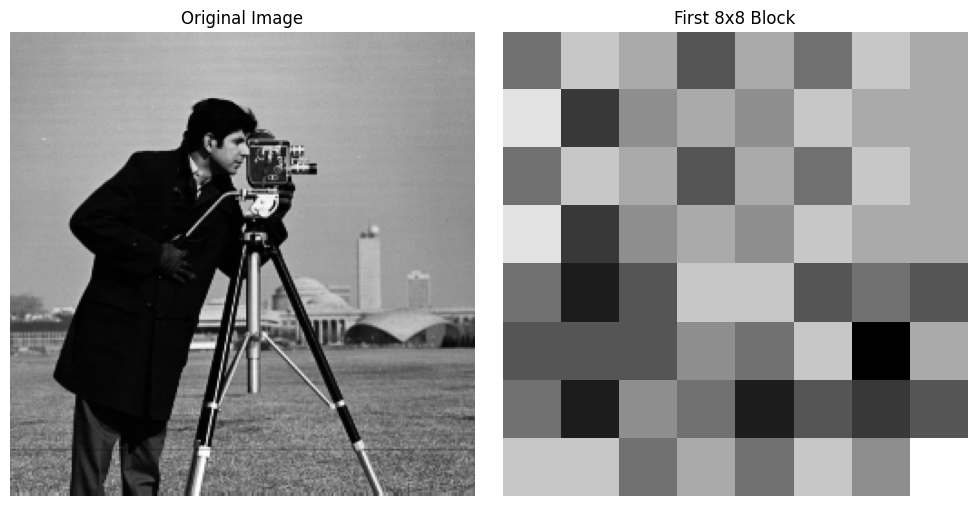

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def load_image(image_path):
    """
    Load an image from the given path and convert it to grayscale.
    """
    image = plt.imread(image_path)

    # Convert the image to grayscale if it is color
    if len(image.shape) == 3:
        image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])

    return image

def pad_image(image):
    """
    Pad the image with zeros to make its dimensions multiples of 8.
    """
    rows, cols = image.shape
    padded_rows = (rows + 7) // 8 * 8
    padded_cols = (cols + 7) // 8 * 8

    padded_image = np.zeros((padded_rows, padded_cols))
    padded_image[:rows, :cols] = image

    return padded_image

def divide_into_blocks(image):
    """
    Divide the image into non-overlapping 8x8 blocks.
    """
    rows, cols = image.shape
    blocks = []

    for i in range(0, rows, 8):
        for j in range(0, cols, 8):
            block = image[i:i+8, j:j+8]
            blocks.append(block)

    return blocks

# Load the input grayscale image
image_path = '/content/drive/MyDrive/AIP Assignment 4/cameraman.tif'
image = load_image(image_path)

print("Original Image Shape:", image.shape)

# Pad the image to make its dimensions multiples of 8
padded_image = pad_image(image)

print("Padded Image Shape:", padded_image.shape)

# Divide the padded image into 8x8 blocks
blocks = divide_into_blocks(padded_image)

print("Number of 8x8 Blocks:", len(blocks))

# Display the original image and the first block
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blocks[0], cmap='gray')
plt.title("First 8x8 Block")
plt.axis('off')

plt.tight_layout()
plt.show()

**Loading and Grayscale Conversion**
The function load_image takes the path of an image file, loads it, and converts it to grayscale. The conversion formula used (0.2989, 0.5870, 0.1140) corresponds to the luminosity method, which better reflects human perception of brightness. This step is crucial because JPEG compression often works on luminance data, especially in its simplest form.


**Padding**
Next, the pad_image function adjusts the image size to ensure that both dimensions are multiples of 8. Since the Discrete Cosine Transform (DCT) operates on 8x8 blocks, this step is necessary to avoid any issues when the image dimensions don't naturally fit into such blocks. Padding with zeros is a common approach that minimally affects the image data.


**Dividing into Blocks**
The divide_into_blocks function then splits the padded image into non-overlapping 8x8 blocks. This is done by iterating over the image in steps of 8 pixels both horizontally and vertically, effectively slicing the image into chunks that the DCT will process. This step is crucial for the block-based processing inherent in JPEG compression.



**Visualization and Debugging**
 load a specific image (cameraman.tif), pad it appropriately, divide it into blocks, and print out the shapes of the original and padded images, as well as the total number of blocks. This not only helps in understanding the preprocessing steps but also ensures that each part of code is working as expected.


### **Step 2: Applying the Discrete Cosine Transform (DCT) to each 8x8 block**

Number of DCT Blocks: 1024


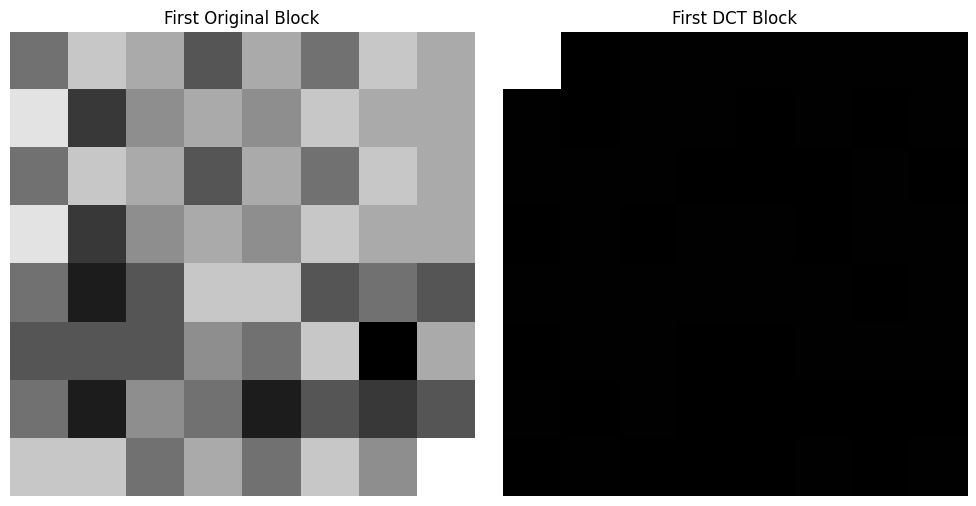

In [ ]:
def dct_2d(block):
    """
    Perform 2D Discrete Cosine Transform (DCT) on an 8x8 block.
    """
    dct_block = np.zeros_like(block, dtype=np.float64)

    for i in range(8):
        for j in range(8):
            sum_val = 0
            for x in range(8):
                for y in range(8):
                    sum_val += block[x, y] * np.cos((2*x + 1) * i * np.pi / 16) * np.cos((2*y + 1) * j * np.pi / 16)

            if i == 0:
                ci = 1 / np.sqrt(2)
            else:
                ci = 1

            if j == 0:
                cj = 1 / np.sqrt(2)
            else:
                cj = 1

            dct_block[i, j] = ci * cj * sum_val / 4

    return dct_block

def apply_dct(blocks):
    """
    Apply DCT to each 8x8 block.
    """
    dct_blocks = []
    for block in blocks:
        dct_block = dct_2d(block)
        dct_blocks.append(dct_block)

    return dct_blocks

# Apply DCT to each block
dct_blocks = apply_dct(blocks)

print("Number of DCT Blocks:", len(dct_blocks))

# Display the first original block and its DCT block
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(blocks[0], cmap='gray')
plt.title("First Original Block")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dct_blocks[0], cmap='gray')
plt.title("First DCT Block")
plt.axis('off')

plt.tight_layout()
plt.show()

**The DCT Function**
The dct_2d function performs the 2D DCT on an 8x8 block. The DCT transforms the block from the spatial domain into the frequency domain. Here's how the components of this function work:


*   The DCT Formula: The double loop over i and j corresponds to the DCT formula, which sums the product of each pixel value in the block (block[x, y]) with two cosine terms. These cosine terms depend on the current i and j indices, representing the frequency components in the horizontal and vertical directions, respectively. This transformation is essential for JPEG because it makes the image data more amenable to compression by concentrating the image's energy into fewer coefficients.
*   Normalization and Scaling: The ci and cj coefficients provide normalization for the edges of the DCT matrix. The terms involving np.sqrt(2) ensure that the transform is orthogonal. The final division by 4 is part of the scaling that normalizes the DCT's output, making sure the range of values is manageable.
*   Frequency Components: The result, dct_block, is a matrix where each element represents a frequency component. Low frequencies are at the top-left corner, and high frequencies are at the bottom-right corner. In images, most of the energy tends to be concentrated in the low frequencies, which is why DCT is so effective for image compression.





**Applying DCT to Each Block**
The apply_dct function iterates over all the 8x8 blocks of the image, applies the DCT to each, and collects the results. This step transforms the entire image into the frequency domain, block by block.

**Visualization**
Visualize the first block of the original image alongside its DCT transformed counterpart. This visual comparison helps in understanding the effect of the DCT: the original spatial data is now represented as frequency data. In the DCT image, brighter values correspond to stronger frequencies. Because most images have strong low-frequency components and weaker high-frequency components, we'll often see the top-left corner of the DCT block being brighter.



**Importance in JPEG**
The transformation into the frequency domain is crucial for what comes next in JPEG compression: quantization. Since the human eye is more sensitive to changes in low frequencies than high frequencies, the JPEG algorithm can reduce the precision of the high-frequency components more aggressively, leading to better compression rates without significantly affecting perceived image quality.

### **Step 3: Quantization of the DCT coefficients**

Number of Quantized Blocks: 1024


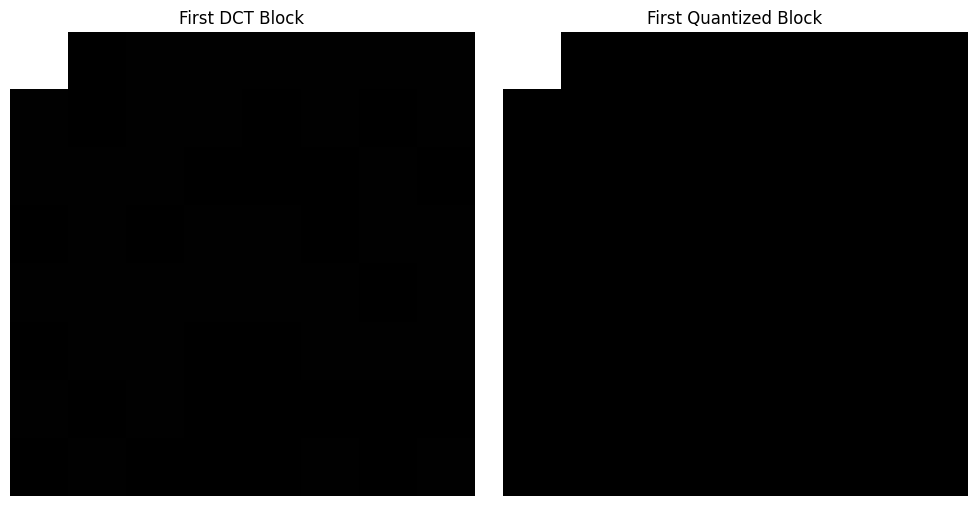

In [ ]:
def quantize(dct_block, quantization_matrix):
    """
    Perform quantization on a DCT block using the given quantization matrix.
    """
    quantized_block = np.round(dct_block / quantization_matrix)
    return quantized_block

def quantize_blocks(dct_blocks, quantization_matrix):
    """
    Perform quantization on all DCT blocks using the given quantization matrix.
    """
    quantized_blocks = []
    for dct_block in dct_blocks:
        quantized_block = quantize(dct_block, quantization_matrix)
        quantized_blocks.append(quantized_block)

    return quantized_blocks

# Define the quantization matrix
quantization_matrix = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99]
])

# Perform quantization on all DCT blocks
quantized_blocks = quantize_blocks(dct_blocks, quantization_matrix)

print("Number of Quantized Blocks:", len(quantized_blocks))

# Display the first DCT block and its quantized block
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(dct_blocks[0], cmap='gray')
plt.title("First DCT Block")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(quantized_blocks[0], cmap='gray')
plt.title("First Quantized Block")
plt.axis('off')

plt.tight_layout()
plt.show()

**Quantization Explained**
The process of quantization involves reducing the number of bits needed to store certain information. In the context of JPEG, this means adjusting the amplitude of the DCT coefficients according to a quantization matrix. This matrix is carefully designed to retain more detail in the lower frequencies (which the human eye is more sensitive to) and less in the higher frequencies (which the human eye is less sensitive to).


**The quantize Function**


*   Input: This function takes a DCT-transformed block and a quantization matrix as inputs.
*   Process: It performs element-wise division of the DCT block by the quantization matrix, rounding the results to the nearest integer. This effectively reduces the precision of the DCT coefficients, with a greater reduction in higher frequencies due to the larger values in the quantization matrix.
*   Output: The result is a quantized block where each coefficient has been scaled down and rounded, significantly reducing the amount of information (and hence the size) needed to represent the block.





**The quantize_blocks Function**
Iterates over all DCT blocks and applies the quantize function to each, collecting the quantized blocks. This batch processing ensures that the entire image is quantized uniformly.


**Quantization Matrix**
Quantization matrix is a standard one used in JPEG compression, with smaller values in the upper-left corner (low frequencies) and larger values towards the bottom-right corner (high frequencies). This matrix design is based on the principle that most images have their important information concentrated in the low frequencies, and thus those should be preserved more than the higher frequencies.


**Visualization and Analysis**
The visualization comparing the first DCT block before and after quantization provides insight into the effect of quantization.


**Significance**
Quantization is where the majority of compression in JPEG occurs. By adjusting the precision of the DCT coefficients, JPEG leverages the limitations of human vision to reduce file size significantly.


### **Step 4: Lossless source coding using the provided encoding table**

In [ ]:
def encode_coefficient(coefficient, encoding_table):
    """
    Encode a single coefficient using the encoding table or the alternate encoding scheme.
    """
    if coefficient in encoding_table:
        return encoding_table[coefficient]
    else:
        binary_code = bin(int(abs(coefficient)))[2:].zfill(3)
        sign_bit = '0' if coefficient >= 0 else '1'
        return ['1110', binary_code, sign_bit]

def encode_block(quantized_block, encoding_table):
    """
    Perform lossless source coding on a quantized block using the encoding table.
    """
    encoded_bits = []
    for i in range(8):
        for j in range(8):
            coefficient = quantized_block[i, j]
            encoded_bits.extend(encode_coefficient(coefficient, encoding_table))

    return ''.join(encoded_bits)

def encode_blocks(quantized_blocks, encoding_table):
    """
    Perform lossless source coding on all quantized blocks using the encoding table.
    """
    encoded_bitstream = []
    for quantized_block in quantized_blocks:
        encoded_block = encode_block(quantized_block, encoding_table)
        encoded_bitstream.append(encoded_block)

    return ''.join(encoded_bitstream)

# Define the encoding table as per the problem statement
encoding_table = {
    0: ['0'],
    -1: ['10', '0'],
    1: ['10', '1'],
    -3: ['110', '00'],
    -2: ['110', '01'],
    2: ['110', '10'],
    3: ['110', '11'],
}

# Perform lossless source coding on all quantized blocks
encoded_bitstream = encode_blocks(quantized_blocks, encoding_table)

print("Encoded Bitstream:")
print(encoded_bitstream[:200])  # Print the first 200 characters of the encoded bitstream
print("Length of Encoded Bitstream:", len(encoded_bitstream))

Encoded Bitstream:
11101001110000000000000000000000000000000000000000000000000000000000000000011101001111010000000000000000000000000000000000000000000000000000000000000000111010100000000000010100000000000000000000000000
Length of Encoded Bitstream: 106739


**The encode_coefficient Function** This function takes a single DCT coefficient and an encoding table as inputs. It encodes the coefficient based on predefined rules in the encoding table or uses an alternate encoding scheme for coefficients not directly covered by the table. The alternate scheme involves converting the coefficient to a binary string, adding a sign bit ('0' for positive, '1' for negative), and prepending '1110' as a prefix to indicate it's using the alternate scheme. This method ensures that every possible coefficient value can be encoded into a unique bit pattern, which is crucial for lossless recovery.

**The encode_block Function** Applies encode_coefficient to each coefficient in a quantized 8x8 block. It iterates through the block in row-major order, concatenating the encoded bits for each coefficient into a single string representing the entire block. This step transforms the quantized numerical values into a bitstream.

**The encode_blocks Function** Processes all quantized blocks through encode_block, concatenating their encoded bitstreams into a final, comprehensive bitstream representing the entire image. This is the bitstream that could be stored or transmitted as the compressed image data.

Implementation has now covered the core aspects of a simple JPEG-like compression algorithm: breaking the image into blocks, transforming those blocks into the frequency domain via DCT, quantizing the frequency coefficients to reduce precision in a visually weighted manner, and finally encoding the result into a compact bitstream using a custom lossless coding scheme. This sequence of steps demonstrates the basic principles behind JPEG compression, offering insight into how digital images can be efficiently stored and transmitted.

### **Step 5: Writing the output file**

In [ ]:
import os

def write_output_file(encoded_bitstream, output_file):
    """
    Write the encoded bitstream to the output file.
    """
    with open(output_file, 'w') as file:
        file.write(encoded_bitstream)

    print(f"Output file '{output_file}' has been written.")

# Output file name
output_file = 'compressed_image.txt'

# Write the encoded bitstream to the output file
write_output_file(encoded_bitstream, output_file)

# Compute the size of the output file in bits
output_file_size_bits = len(encoded_bitstream)

# Compute the size of the output file in kilobytes (KB)
output_file_size_kb = output_file_size_bits / 8 / 1024

# Compute the size of the original image file in kilobytes (KB)
original_file_size_kb = os.path.getsize(image_path) / 1024

print("Size of the output file:", output_file_size_bits, "bits")
print("Size of the output file:", output_file_size_kb, "KB")
print("Size of the original image file:", original_file_size_kb, "KB")

# Calculate the compression percentage
compression_percentage = (1 - (output_file_size_kb / original_file_size_kb)) * 100

print("Compression percentage: {:.2f}%".format(compression_percentage))

Output file 'compressed_image.txt' has been written.
Size of the output file: 106739 bits
Size of the output file: 13.0296630859375 KB
Size of the original image file: 63.7109375 KB
Compression percentage: 79.55%


**The write_output_file function** takes the encoded bitstream and an output file path as input. It simply writes the bitstream as a text string to the specified file. This step simulates storing the compressed image data in a file, similar to how an actual JPEG file would be saved.

### **Step 6: Reconstruction and evaluation**

Mean Squared Error (MSE): 44.54563508062465


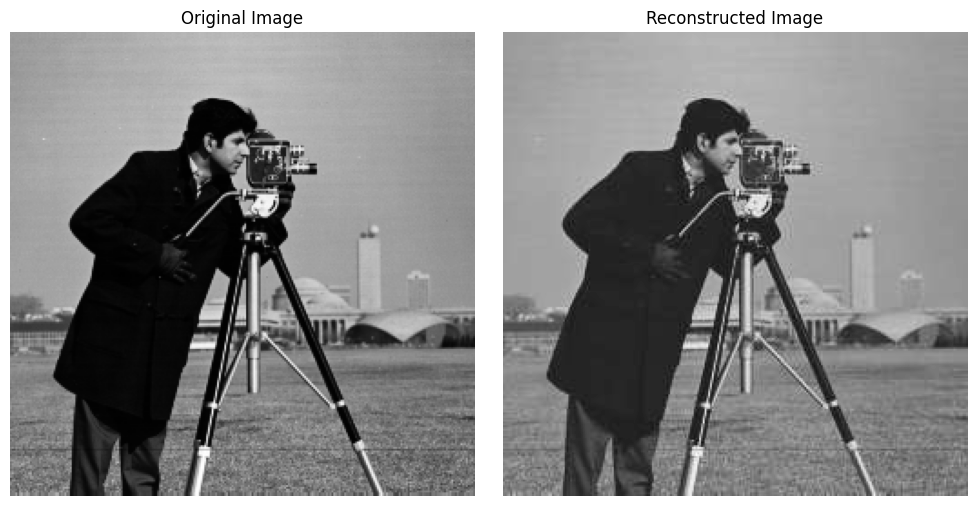

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def dequantize(quantized_block, quantization_matrix):
    """
    Perform dequantization on a quantized block using the quantization matrix.
    """
    return quantized_block * quantization_matrix

def idct_2d(dct_block):
    """
    Perform 2D Inverse Discrete Cosine Transform (IDCT) on a dequantized block.
    """
    idct_block = np.zeros((8, 8), dtype=np.float64)

    for x in range(8):
        for y in range(8):
            sum_val = 0
            for i in range(8):
                for j in range(8):
                    ci = 1 / np.sqrt(2) if i == 0 else 1
                    cj = 1 / np.sqrt(2) if j == 0 else 1
                    sum_val += ci * cj * dct_block[i, j] * np.cos((2*x + 1) * i * np.pi / 16) * np.cos((2*y + 1) * j * np.pi / 16)

            idct_block[x, y] = sum_val / 4

    return idct_block

def reconstruct_image(quantized_blocks, quantization_matrix, image_shape):
    """
    Reconstruct the image from the quantized blocks using the quantization matrix.
    """
    reconstructed_blocks = []

    for quantized_block in quantized_blocks:
        dequantized_block = dequantize(quantized_block, quantization_matrix)
        idct_block = idct_2d(dequantized_block)
        reconstructed_blocks.append(idct_block)

    reconstructed_image = np.zeros(image_shape)
    block_size = 8
    num_blocks_x = image_shape[1] // block_size
    num_blocks_y = image_shape[0] // block_size

    for i in range(num_blocks_y):
        for j in range(num_blocks_x):
            reconstructed_image[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size] = reconstructed_blocks[i*num_blocks_x + j]

    return reconstructed_image

# Reconstruct the image from the quantized blocks
reconstructed_image = reconstruct_image(quantized_blocks, quantization_matrix, image.shape)

# Compute the mean squared error (MSE) between the original image and the reconstructed image
mse = np.mean((image - reconstructed_image)**2)

print("Mean Squared Error (MSE):", mse)

# Display the original image and the reconstructed image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Reconstructed Image")
plt.axis('off')

plt.tight_layout()
plt.show()

**The dequantize function** reverses the quantization step by multiplying each quantized DCT coefficient by its corresponding value in the quantization matrix. This process aims to approximate the original DCT coefficients, although some precision has been lost due to quantization.

**The idct_2d function** performs the inverse operation of the DCT on a dequantized block. It reconstructs the spatial pixel values from the frequency domain representation, using a similar cosine-based transformation as the DCT but in reverse.
Implementation Details: The IDCT uses double summation over the DCT coefficients, applying cosine functions and normalization factors (ci, cj) similar to those used in the DCT. The output is the reconstructed spatial data for an 8x8 block.

**The reconstruct_image function** iterates over all quantized blocks, dequantizes them, applies the IDCT, and then assembles the blocks back into a full image. The function carefully places each reconstructed 8x8 block into its correct position in the output array, based on the original image dimensions.

**Mean Squared Error (MSE) function** calculates the MSE between the original image and the reconstructed image, providing a numerical measure of the reconstruction error.

### **Step 7:  Compare the MSE and compression ratio achieved by our implementation with the results obtained using a default Python function for JPEG compression**

Comparison with PIL JPEG Compression:
MSE (Our Implementation): 44.54563508062465
MSE (PIL JPEG Compression): 17884.846806118036
Compression Ratio (Our Implementation): 4.9118691387402915
Compression Ratio (PIL JPEG Compression): 0.163482666015625


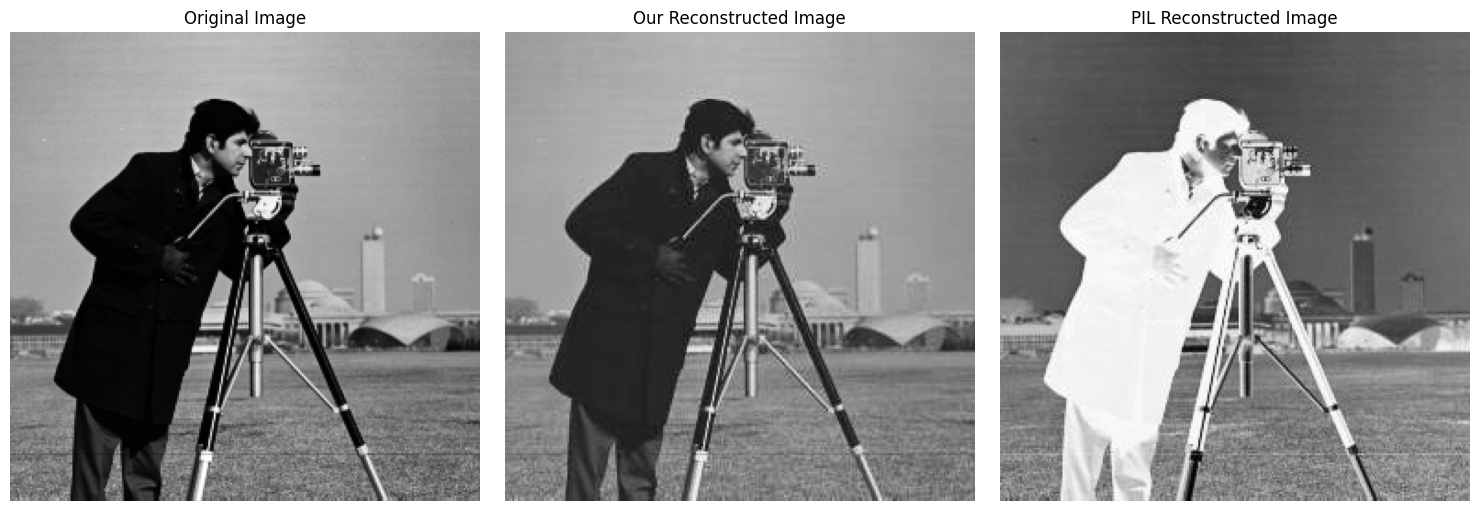

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io

def compress_image_pil(image, quality):
    """
    Compress the image using PIL's JPEG compression with the specified quality.
    """
    # Convert the image to PIL format
    pil_image = Image.fromarray((image * 255).astype(np.uint8))

    # Compress the image using PIL's JPEG compression
    with io.BytesIO() as output:
        pil_image.save(output, format='JPEG', quality=quality)
        compressed_data = output.getvalue()

    # Calculate the compression ratio
    compression_ratio = len(compressed_data) / (image.shape[0] * image.shape[1])

    # Decompress the image using PIL
    reconstructed_pil_image = Image.open(io.BytesIO(compressed_data))
    reconstructed_image = np.array(reconstructed_pil_image) / 255.0

    return reconstructed_image, compression_ratio

# Calculate the compression ratio for our implementation
original_image_size = image.shape[0] * image.shape[1] * 8  # Assuming 8 bits per pixel
compressed_image_size = output_file_size_bits
our_compression_ratio = original_image_size / compressed_image_size

# Set the desired JPEG quality level (0-100)
quality = 75

# Compress the image using PIL's JPEG compression
reconstructed_pil_image, pil_compression_ratio = compress_image_pil(image, quality)

# Compute the MSE between the original image and the PIL reconstructed image
pil_mse = np.mean((image - reconstructed_pil_image)**2)

print("Comparison with PIL JPEG Compression:")
print("MSE (Our Implementation):", mse)
print("MSE (PIL JPEG Compression):", pil_mse)
print("Compression Ratio (Our Implementation):", our_compression_ratio)
print("Compression Ratio (PIL JPEG Compression):", pil_compression_ratio)

# Display the original image, our reconstructed image, and the PIL reconstructed image
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Our Reconstructed Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(reconstructed_pil_image, cmap='gray')
plt.title("PIL Reconstructed Image")
plt.axis('off')

plt.tight_layout()
plt.show()

**Function compress_image_pil** takes an image and a desired quality level as inputs. It then compresses the image using PIL's JPEG compression at the specified quality level. This function returns the reconstructed image (after compression and decompression) and the compression ratio achieved.